In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [10]:
# Función para el método del punto fijo
def punto_fijo(g, x0, tolerancia=1e-3, max_iter=10):
    # Almacenar los valores de las iteraciones
    valores_x = [x0]
    valores_gx = []
    errores = []

    # Método del punto fijo
    for i in range(max_iter):
        x1 = g(x0)
        valores_x.append(x1)
        valores_gx.append(g(x0))
        error = abs(x1 - x0)
        errores.append(error)
        if error < tolerancia:
            break
        x0 = x1

    return valores_x, valores_gx, errores

# Función para graficar el resultado
def graficar_punto_fijo(valores_x, valores_gx, errores, g):
    # Preparar datos para la gráfica
    x_vals = np.linspace(min(valores_x) - 0.1, max(valores_x) + 0.1, 400)
    y_vals_g = g(x_vals)

    # Crear la figura con subplots: uno para la gráfica y otro para la tabla
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

    # --- Primer gráfico (iteraciones del punto fijo) ---
    # Graficar g(x) y y = x
    ax1.plot(x_vals, y_vals_g, label=r'$y = g(x)$', color='green', lw=1.5)
    ax1.plot(x_vals, x_vals, label=r'$y = x$', color='blue', lw=1.5)

    # Dibujar las flechas de las iteraciones
    for i in range(len(valores_x) - 1):
        ax1.annotate('', xy=(valores_x[i], g(valores_x[i])), xytext=(valores_x[i], valores_x[i]),
                     arrowprops=dict(facecolor='black', edgecolor='black', arrowstyle='->'))
        ax1.annotate('', xy=(g(valores_x[i]), g(valores_x[i])), xytext=(valores_x[i], g(valores_x[i])),
                     arrowprops=dict(facecolor='black', edgecolor='black', arrowstyle='->'))

    # Configuraciones adicionales para la gráfica
    ax1.set_xlabel('x')
    ax1.set_ylabel('y')
    ax1.set_title('Iteraciones del Método del Punto Fijo')
    ax1.legend(loc='lower right')
    ax1.grid(True)
    x_min = min(valores_x) - 0.01
    x_max = max(valores_x) + 0.01
    ax1.set_xlim(x_min, x_max)
    ax1.set_ylim(x_min, x_max)

    # --- Segundo subplot (tabla de valores) ---
    # Crear los datos para la tabla
    col_labels = ['Iteración', '$x_n$', '$g(x_n)$', '$|x_n - x_{n+1}|$']
    table_data = []
    for i in range(len(valores_gx)):
        table_data.append([i+1, f'{valores_x[i]:.4f}', f'{valores_gx[i]:.4f}', f'{errores[i]:.4f}'])

    # Añadir la tabla
    ax2.axis('tight')
    ax2.axis('off')
    table = ax2.table(cellText=table_data, colLabels=col_labels, loc='center', cellLoc='center', colColours=['#f2f2f2']*4)

    # Ajustar la disposición
    plt.tight_layout()

    # Mostrar la gráfica y la tabla
    plt.show()

# Anteriormente

# Ejemplo
$f(x) = e^{x}+x-4 $  
raíz entre [1,2]

### Solución 1
$g_{1}(x) =4-e^{x}$  

### Solución 2
$g_{2}(x)=log(4−x)$ (usando el logaritmo natural)

### Solución 3
$g_{3}(x) = e^{x}-4 + 2x $


In [11]:
# Definimos las funciones g y sus derivadas
g1 = lambda x: 4 - np.exp(x)
#g1_derivada = lambda x: np.abs(-np.exp(x))

g2 = lambda x: np.log(4 - x)
#g2_derivada = lambda x: np.abs(-1 / (4 - x))

g3 = lambda x: np.exp(x) - 4 + 2*x
#g3_derivada = lambda x: np.abs(np.exp(x) + 2)


In [ ]:
x0 = 0.5  # Valor inicial
tolerancia = 1e-3
max_iter = 10

# Llamar a la función punto_fijo para obtener los valores
valores_x, valores_gx, errores = punto_fijo(g3, x0, tolerancia, max_iter)

# Graficar el resultado
graficar_punto_fijo(valores_x, valores_gx, errores, g1)

# La convergencia del método de punto fijo está determinada por varios factores:

1. Elección de $g(x)$: No todas las reescrituras de
$f(x)=0$ en la forma $x=g(x)$ son adecuadas para el método de punto fijo. Algunas funciones $g(x)$ pueden no tener puntos fijos o pueden alejarse del punto fijo con cada iteración

2. Derivada de $g(x)$: Si existe un punto fijo $p$ tal que
$g(p)=p$ y si ∣$g′(p)$∣<1, entonces el método de punto fijo converge linealmente para valores iniciales $p_{0}$ suficientemente cercanos a $p$. Si ∣$g′(p)$∣>1, el método puede no converger.

3. Valor inicial $p_{0}$ : Incluso con una buena elección de $g(x)$, si el valor inicial  $p_{0}$ está demasiado alejado del punto fijo real, el método puede no converger o puede converger muy lentamente.

4. Iteraciones oscilatorias: En algunos casos, el método de punto fijo puede oscilar entre dos o más valores sin converger a un punto fijo.

5. Iteraciones divergentes: El método puede alejarse del punto fijo real con cada iteración en lugar de acercarse a él.


**Resumiendo...**



> Para evaluar la convergencia de un método iterativo basado en una función $g$, uno de los criterios más comunes es el Criterio de Convergencia de punto fijo. Según este criterio, si
$∣g'(x)∣<1$ en un intervalo que contiene a la raíz, entonces el método iterativo $x_{n+1}=g(x_{n})$ es convergente en ese intervalo.



**Dicho de manera fácil, si la derivada de $g$ en magnitud es menor que 1 cerca de la raíz, entonces la función $g$ es convergente.**

### Derivemos Y Para evaluar la convergencia, necesitamos verificar si
$∣g_{1,2,3}'(x)∣<1$ cerca de la raíz. Por ejemplo [-2,2]

#### Solución 1
$g_{1}(x) =4-e^{x}$  

$g_{1}'(x) =-e^{x}$  

#### Solución 2
$g_{2}(x)=log(4−x)$


$g_{2}'(x)$ = $\frac{-1}{\text{4-$x$}} $



#### Solución 3
$g_{3}(x) = e^{x}-4 + 2x $

$g_{3}'(x) = e^{x}+ 2 $


In [19]:
# Evaluamos las derivadas en un intervalo razonable para las funciones
# Definimos las funciones g y sus derivadas
#g1 = lambda x: 4 - np.exp(x)
g1_derivada = lambda x: np.abs(-np.exp(x))

#g2 = lambda x: np.log(4 - x)
g2_derivada = lambda x: np.abs(-1 / (4 - x))

#g3 = lambda x: np.exp(x) - 4 + 2*x
g3_derivada = lambda x: np.abs(np.exp(x) + 2)

INTERVALO_INICIAL = -2
INTERVALO_FINAL = 2
x_values_g1 = np.linspace(INTERVALO_INICIAL, INTERVALO_FINAL, 400)
x_values_g2 = np.linspace(INTERVALO_INICIAL, INTERVALO_FINAL, 400)  # Evitamos valores donde log(4 - x) no está definida
x_values_g3 = np.linspace(INTERVALO_INICIAL, INTERVALO_FINAL, 400)


In [ ]:
# Crear la figura con subplots ajustados
plt.figure(figsize=(10, 12))

# Subplot para g1
plt.subplot(3, 1, 1)
plt.plot(x_values_g1, g1_derivada(x_values_g1), label="|g1'(x)|", color='blue')
plt.axhline(1, color='red', linestyle='--', linewidth=0.5, label='|g\'(x)| = 1')
plt.title(r"|g1'(x)|=|$-e^{x}$|", fontsize=14)
plt.xlabel('x')
plt.ylabel('|g1\'(x)|')
plt.grid(True)
plt.legend()

# Subplot para g2
plt.subplot(3, 1, 2)
plt.plot(x_values_g2, g2_derivada(x_values_g2), label="|g2'(x)|", color='green')
plt.axhline(1, color='red', linestyle='--', linewidth=0.5, label='|g\'(x)| = 1')
plt.title(r"|g2'(x)|=|-1/(4-x)$|", fontsize=14)
plt.xlabel('x')
plt.ylabel('|g2\'(x)|')
plt.grid(True)
plt.legend()

# Subplot para g3
plt.subplot(3, 1, 3)
plt.plot(x_values_g3, g3_derivada(x_values_g3), label="|g3'(x)|", color='purple')
plt.axhline(1, color='red', linestyle='--', linewidth=0.5, label='|g\'(x)| = 1')
plt.title(r"|g3'(x)|=|$e^{x}+2$|", fontsize=14)
plt.xlabel('x')
plt.ylabel('|g3\'(x)|')
plt.grid(True)
plt.legend()

# Ajustar la disposición para evitar superposiciones
plt.tight_layout()

# Mostrar la gráfica
plt.show()


## Conclusión

Para $g_{1}$


* Dado que g1'(x)=$-e^{x}$
  y su magnitud es siempre mayor que 1, no esperamos que el método de punto fijo converja para esta función. Si intentas correr el método, es probable que no encuentres una raíz o que alcances el número máximo de iteraciones sin obtener una solución que cumpla con la tolerancia deseada.

Para $g_{2}$

* La derivada es $g2'(x)=-1/(4-x)$. Esta función tiene una discontinuidad en x=4. Dependiendo del valor inicial
$p0$ y del intervalo en el que estés trabajando, el método podría converger a una solución o no. Si $p0$ está cerca de 4, es probable que el método no converja. Sin embargo, si eliges un $p0$ adecuado y alejado de 4, podrías encontrar una raíz.

Para $g_{3}$


* Dado que g3'(x)= $e^{x}+ 2$ y su magnitud es siempre mayor que 1, no esperamos que el método de punto fijo converja para esta función. Al igual que con $g_{1}$, al correr el método, no encuentramos una raíz y alcanzamos el número máximo de iteraciones sin obtener una solución que cumpla con la tolerancia deseada.


# Cerramos con Sympy y  presentación Newton

$f(x) = x-e^{-x}$

$g(x)=e^{-x}$ 🧙

$g'(x)=-e^{-x}$ 🏂


# SymPy

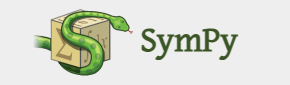

https://www.sympy.org/es/

### ¿Qué es SymPy?

SymPy es una biblioteca de Python para matemática simbólica. A diferencia de la matemática numérica, donde se realizan cálculos con números específicos, la matemática simbólica trabaja con expresiones matemáticas en forma simbólica. Por ejemplo, en lugar de obtener un valor decimal para una derivada, SymPy puede proporcionar una fórmula exacta.

#### ¿Qué se puede hacer con SymPy?

Con SymPy, podes realizar una  variedad de operaciones, ejemplo:

1. Álgebra: Simplificación, expansión, sustitución, solución de ecuaciones, etc.
2. Cálculo: Derivación, integración, límites, series de Taylor, etc.
3. Ecuaciones Diferenciales: Resolver ecuaciones diferenciales ordinarias y parciales.
4. Geometría: Definir y manipular objetos geométricos como puntos, líneas, círculos, etc.
5. Matrices: Operaciones con matrices, determinantes, autovalores, autovectores, etc.
6. Gráficas: Visualizar funciones, regiones, y otros objetos matemáticos.
7. Teoría de Números: Funciones primas, teoría de divisibilidad, etc.
8. Física: Módulos específicos para mecánica clásica, óptica, cuántica, entre otros.
9. Y mucho más: Lógica, polinomios, combinatoria, etc.

### SymPy vs NumPy

**SymPy:**

Enfoque: Matemática simbólica.

Propósito: Manipulación algebraica, simplificación, derivación, integración, solución de ecuaciones y muchas otras operaciones en forma simbólica.

Resultado: Proporciona respuestas exactas en forma de expresiones matemáticas.

Uso: Ideal para matemáticas teóricas, derivación de fórmulas y cuando se necesita precisión exacta.

**NumPy:**

Enfoque: Computación numérica.

Propósito: Proporciona operaciones matriciales, funciones matemáticas, herramientas para trabajar con arrays multidimensionales y mucho más.

Resultado: Proporciona respuestas aproximadas en forma numérica.

Uso: Ideal para cálculos científicos, ingeniería, análisis de datos y cuando se necesita rendimiento y cálculos con datos reales.

**Similitudes**:

Ambas son bibliotecas de Python diseñadas para cálculos matemáticos.
Ambas tienen una amplia documentación y una comunidad activa.
Proporcionan funciones y herramientas para una variedad de operaciones matemáticas.

**Combinando SymPy y NumPy:**

Aunque SymPy y NumPy tienen enfoques diferentes, a menudo es útil combinarlas, especialmente cuando se necesita derivar una fórmula simbólicamente y luego evaluarla numéricamente para diferentes conjuntos de datos.

1. Derivar una fórmula con SymPy: Puedes usar SymPy para derivar una fórmula o expresión matemática.

2. Convertir la fórmula a una función NumPy: Una vez que tienes una fórmula simbólica, puedes convertirla en una función NumPy usando lambdify de SymPy. Esto te permite evaluar la fórmula para arrays de datos.

``` python
from sympy import symbols, lambdify, sin
import numpy as np

x_ = symbols('x_')
expr = sin(x_)
f_ = lambdify(x_, expr, "numpy")


y_values = f_(np.linspace(0, np.pi, 100))


```
3. Evaluación numérica: Una vez que tienes la función NumPy, puedes usarla para realizar cálculos numéricos rápidos, análisis de datos, graficación y más.


In [ ]:
import sympy as sp

# Definir la variable simbólica x
x_ = sp.symbols('x_')

# Definir la función f(x)
f_ = x_ - sp.exp(-x_)

# Calcular la derivada de f con respecto a x
f__derivada = sp.diff(f_, x_)

# Mostrar la función y su derivada
print("f(x) =", f_)
print("f'(x) =", f__derivada)

# Si deseas evaluar la derivada en un punto específico, por ejemplo x=1:
f__derivada.subs(x_, 1)



In [22]:
valor_numerico = f__derivada.subs(x_, 1).evalf()
print("f'(1) =", valor_numerico)

f'(1) = 1.36787944117144


In [ ]:
#graficar
sp.plot(f_, (x_, -2, 2),
        title="Gráfica de f(x) = x - e^{-x}",
        xlabel="x", ylabel="f(x)")


In [24]:
# Encontrar las raíces de f_
raices = sp.solve(f_, x_)

print("Raíces de f(x) =", raices)

Raíces de f(x) = [LambertW(1)]


In [25]:
# "Vamos a tomar como raíz 'verdadera'"
raices_numericas = [raiz.evalf() for raiz in raices]
print("Raíces numéricas de f(x) =", raices_numericas)

Raíces numéricas de f(x) = [0.567143290409784]


# Método de Newton (o Método de Newton-Raphson) 🍎🌲



El método de Newton es un algoritmo iterativo utilizado para encontrar aproximaciones de las raíces (o ceros) de una función real. Es uno de los métodos numéricos más conocidos y eficientes para encontrar raíces de funciones no lineales.

**Fundamento:**
El método se basa en la idea de linealizar la función en un punto y usar la recta tangente para encontrar una mejor aproximación de la raíz. La fórmula iterativa es:

$x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}$

Donde:
- $x_{n}$ es la aproximación actual de la raíz.
- $f(x_{n})$ es el valor de la función en $x_{n}$.
- $f'(x_{n})$ es el valor de la derivada de la función en $x_{n}$.
- $x_{n+1}$ es la próxima aproximación de la raíz.

**Pasos básicos del método:**
1. Escoge un valor inicial $x_{0}$ (a menudo basado en una suposición o gráficamente).
2. Calcula $x_{1}$ usando la fórmula iterativa.
3. Repite el proceso usando $x_{1}$ para encontrar $x_{2}$, y así sucesivamente, hasta que la diferencia entre dos aproximaciones consecutivas sea menor que un valor de tolerancia preestablecido o hasta que se alcance un número máximo de iteraciones.

**Ventajas:**
- Convergencia rápida: Bajo ciertas condiciones, el método de Newton tiene una convergencia cuadrática, lo que significa que puede duplicar el número de dígitos correctos en cada paso.
- Es ampliamente utilizado debido a su eficiencia.

**Desventajas:**
- No garantiza la convergencia para cualquier valor inicial $x_{0}$.
- Si $f'(x_{n})$ es muy pequeño o cero, el método puede no converger.
- Puede converger a raíces diferentes dependiendo del valor inicial.

**Requisitos para la convergencia:**
- La función $f(x)$ debe ser continua y diferenciable en el intervalo de interés.
- Se necesita una buena suposición inicial $x_{0}$cercana a la raíz real.
- $f'(x)$ no debe ser cero cerca de la raíz.

**Aplicaciones:**
El método de Newton se utiliza en una amplia variedad de aplicaciones científicas y de ingeniería para resolver ecuaciones no lineales. También se ha extendido para resolver sistemas de ecuaciones no lineales y para optimización, encontrando máximos y mínimos de funciones.

En resumen, el método de Newton es una herramienta poderosa y eficiente para encontrar raíces de funciones, pero es esencial entender sus limitaciones y asegurarse de que se cumplan las condiciones para su convergencia.



![](https://grape-chartreuse-c77.notion.site/image/https%3A%2F%2Fs3-us-west-2.amazonaws.com%2Fsecure.notion-static.com%2Fb6d150f4-bb95-49b5-8aab-5be154e0a64f%2Fnewtonpng.png?table=block&id=0080859e-a80c-4e8b-a31f-2ab359f43d98&spaceId=4b5dbb55-8c34-40fb-9b23-8496ac94faae&width=2000&userId=&cache=v2)

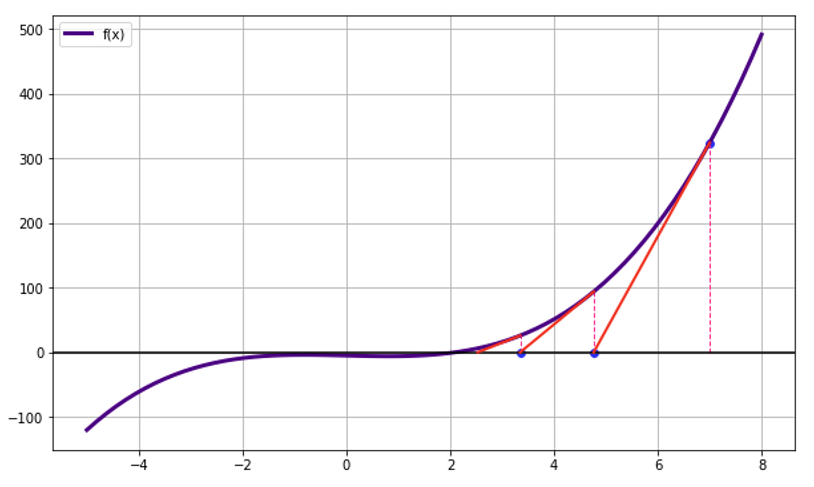

In [26]:
# librerías
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## 01 Utilicemos numpy **x**

In [27]:
def f(x): return ( x**3-2*x-5)
x = np.linspace(0,8,70)

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(10,6))
ax.plot(x,f(x),color='#4b0082', linewidth=3, label ='f(x)')
ax.axhline(y=0, color='k', linestyle='-')
ax.grid(True)
ax.legend()
plt.show()

## 02 Utilicemos sympy recordando que x seguido de guión bajo **x_**

In [29]:
import sympy as sp
from sympy.plotting import plot
from sympy.solvers import solve
x_ = sp.Symbol('x_')
x_

x_

In [ ]:
f_ = x_**3-2*x_-5
print(sp.roots(f_))
plot(f_);

In [31]:
sp.diff(f_)

3*x_**2 - 2

## ejemplo para esta clase $f(x)=x^3-2x-5$ solo para grafico 📈📉

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import sympy as sp
import pandas as pd

# Definimos la función y sus derivadas utilizando SymPy
x_ = sp.Symbol('x_')

# Ejemplo de función
f = x_**3 - 2*x_**2 - 5

# Función para calcular la raíz mediante Newton-Raphson
def metodo_newton(f, p0, tol=1e-4, max_iter=100):
    derivada = sp.diff(f, x_)
    i = 1
    tabla = []
    condicion = True
    tabla.append([i, p0, f.subs(x_, p0).evalf(), abs(f.subs(x_, p0).evalf())])

    while condicion:
        p = p0 - f.subs(x_, p0).evalf() / derivada.subs(x_, p0).evalf()
        error_abs = abs(p - p0)
        tabla.append([i+1, p, f.subs(x_, p).evalf(), error_abs])

        if error_abs < tol:
            condicion = False
            break
        elif i >= max_iter:
            condicion = False

        p0 = p
        i += 1

    columnas = ["Iteración", "p_n", "f(p_n)", "error_abs"]
    df_newton = pd.DataFrame(tabla, columns=columnas)
    return df_newton

# Generamos la tabla de valores para Newton-Raphson
df_newton = metodo_newton(f, p0=6, tol=1e-4, max_iter=10)

# Convertir la función simbólica f(x) a una función lambda de numpy para graficar
f_np = sp.lambdify(x_, f, 'numpy')

# Graficar la función f(x)
x_vals = np.linspace(-4, 8, 400)  # Rango de x
y_vals = f_np(x_vals)

# Crear la figura con subplots para la gráfica y la tabla
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Graficar f(x)
ax1.plot(x_vals, y_vals, label='f(x)', color='purple', lw=2)
ax1.axhline(0, color='black', lw=1)  # Eje x

# Para animar: puntos de Newton, las tangentes y la línea vertical punteada
puntos, = ax1.plot([], [], 'bo', label="Puntos Newton")  # Puntos donde caen las iteraciones
linea_tangente, = ax1.plot([], [], 'r-', lw=2, label="Tangente")  # Líneas tangentes
linea_vertical, = ax1.plot([], [], 'r--', lw=1, label="Línea Vertical")  # Línea punteada
iter_text = ax1.text(0.05, 0.9, '', transform=ax1.transAxes, fontsize=12)  # Texto para la iteración

# Configurar límites
ax1.set_xlim(-4, 8)
ax1.set_ylim(-100, 500)
ax1.legend()
ax1.set_title('Método de Newton-Raphson')

# Función de inicialización para la animación
def init():
    puntos.set_data([], [])
    linea_tangente.set_data([], [])
    linea_vertical.set_data([], [])
    iter_text.set_text('')
    return puntos, linea_tangente, linea_vertical, iter_text

# Función de actualización de la animación
def update(frame):
    # Tomar el valor actual de la iteración
    p_n = df_newton.iloc[frame]["p_n"]

    # Dibujar el punto
    puntos.set_data(df_newton["p_n"][:frame+1], df_newton["f(p_n)"][:frame+1])

    # Dibujar la tangente en p_n
    derivada_np = sp.lambdify(x_, sp.diff(f, x_), 'numpy')
    slope = derivada_np(p_n)
    y_tangent = slope * (x_vals - p_n) + f_np(p_n)
    linea_tangente.set_data(x_vals, y_tangent)

    # Dibujar la línea vertical punteada en p_n
    x_vert = [p_n, p_n]
    y_vert = [0, f_np(p_n)]
    linea_vertical.set_data(x_vert, y_vert)

    # Actualizar el texto de la iteración
    iter_text.set_text(f'Iteración: {frame+1}')

    return puntos, linea_tangente, linea_vertical, iter_text

# Añadir la tabla de resultados en el segundo subplot (ax2)
# Crear los datos para la tabla
col_labels = ["Iteración", "$p_n$", "$f(p_n)$", "error"]
table_data = []
for i in range(len(df_newton)):
    table_data.append([
        f'{df_newton["Iteración"][i]}',
        f'{df_newton["p_n"][i]:.4f}',
        f'{df_newton["f(p_n)"][i]:.4f}',
        f'{df_newton["error_abs"][i]:.4f}'
    ])

# Configurar el subplot de la tabla
ax2.axis('tight')
ax2.axis('off')
table = ax2.table(cellText=table_data, colLabels=col_labels, loc='center', cellLoc='center', colColours=['#f2f2f2']*4)

# Crear la animación
ani = FuncAnimation(fig, update, frames=len(df_newton), init_func=init, blit=True, interval=1000)

# Ajustar la disposición de los subplots
plt.tight_layout()

# Mostrar la animación en HTML
HTML(ani.to_html5_video())


In [49]:
f_

x_**3 - 2*x_ - 5

In [50]:
metodo_newton(f_,p0=6,max_iter=10)

,Iteración,p_n,f(p_n),error_abs
0,1,6,199.000000000000,199.000000000000
1,2,4.12264150943396,56.8238453555620,1.87735849056604
2,3,2.96269941560800,15.0799554950076,1.15994209382596
3,4,2.34296070379546,3.17567904315333,0.619738711812534
4,5,2.12346993542419,0.328050581516394,0.219490768371275
5,6,2.09501153804285,0.00513622202657693,0.0284583973813377
6,7,2.09455160065368,1.32945402508966e-6,0.000459937389173160
7,8,2.09455148154233,8.79296635503124e-14,1.19111343899192e-7


In [36]:
solve(f_, x_)[2].evalf()

2.09455148154233

### Tarea !
 $f(x)=x^3-2x-5$

In [37]:
f1_ = x_**2-x_-6
sp.roots(f1_)
solve(f1_, x_)

[-2, 3]

In [38]:
sp.diff(f1_, x_)

2*x_ - 1

In [40]:
f1_.subs(x_,5).evalf()

14.0000000000000